Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
        
df = pd.read_csv('disney_plus_titles.csv')
df = df.drop('show_id',axis=1)
df.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
9,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,"November 19, 2021",2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      977 non-null    object
 3   cast          1260 non-null   object
 4   country       1231 non-null   object
 5   date_added    1447 non-null   object
 6   release_year  1450 non-null   int64 
 7   rating        1447 non-null   object
 8   duration      1450 non-null   object
 9   listed_in     1450 non-null   object
 10  description   1450 non-null   object
dtypes: int64(1), object(10)
memory usage: 124.7+ KB


In [3]:
df.keys()

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

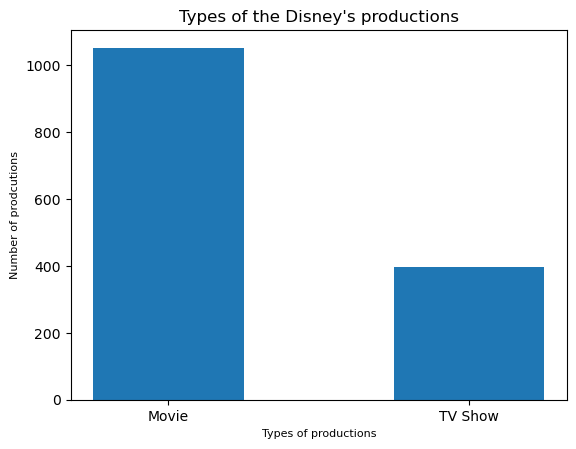

In [4]:
plt.bar(df['type'].unique(), df['type'].value_counts(),width=0.5)
plt.xlabel("Types of productions", fontsize=8)
plt.ylabel("Number of prodcutions", fontsize=8)
plt.title("Types of the Disney's productions", fontsize=12)
plt.show()

In [5]:
# Check for missing values and count them for each column
missing_values = df.isna().sum()

print(missing_values)

type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64


In [6]:
# Finding title with tag 'women'

tag = 'women'
for i in range(len(df)):
    if (tag in df.iloc[i,1].lower()):
        print(df.iloc[i,1])

Women Of Impact: Changing The World
Viking Warrior Women


In [7]:
# Finding title with tag 'black'

tag = 'black'
for i in range(len(df)):
    if (tag in df.iloc[i,1].lower()):
        print(df.iloc[i,1])

Black Widow
Black Beauty
Black Is King
Marvel Studios' Black Panther
Pirates of the Caribbean: The Curse of the Black Pearl
The Black Cauldron
The Black Hole
The Young Black Stallion
Blackbeard's Ghost


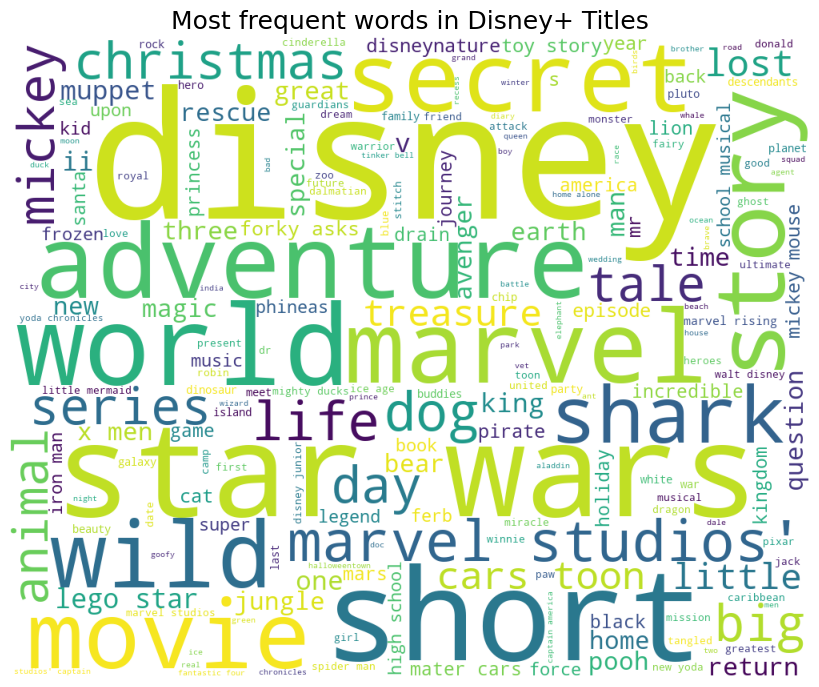

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
comment_words = ''
for line in df.title:
    words = line.lower().split()
    comment_words += " ".join(words)+" "
wordcloud = WordCloud(width = 1000, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Most frequent words in Disney+ Titles", fontsize=18)
plt.show()

In [9]:
print("Numbers of directors: ", len(df['director'].unique()))
print("Mean value of movies directed by one director: ", round(df['director'].value_counts().mean()))

Numbers of directors:  610
Mean value of movies directed by one director:  2


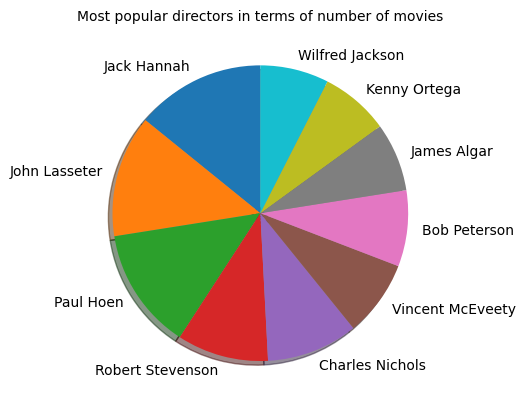

In [10]:
df = df[df['director'] != 'Missing']
top_directors = df['director'].value_counts().head(10)
plt.pie(top_directors, labels = top_directors.index, shadow=True, startangle=90)
plt.title("Most popular directors in terms of number of movies", fontsize=10)
plt.show()

In [11]:
print("Films directed by Jack Hannah: ", '\n', df['title'][df['director']=='Jack Hannah'])

Films directed by Jack Hannah:  
 419                 Trick or Treat
559           Let's Stick Together
568              All in a Nutshell
572        Don's Fountain of Youth
574                 Double Dribble
575                  Dragon Around
581     Lambert, The Sheepish Lion
584                   Out of Scale
590               The New Neighbor
716             A Knight for a Day
742                  Bearly Asleep
745                     Beezy Bear
791                  Chip an' Dale
800                     Corn Chips
1138        Pluto's Christmas Tree
1384                  Trailer Horn
1411                Winter Storage
Name: title, dtype: object


In [12]:
print("Films directed by Jack Hannah: ", '\n', df['title'][df['director']=='Bob Peterson'])

Films directed by Jack Hannah:  
 641       Forky Asks a Question: What is Reading?
645        Forky Asks a Question: What is Cheese?
674         Forky Asks a Question: What is a Pet?
676      Forky Asks a Question: What is a Leader?
681    Forky Asks a Question: What is a Computer?
683          Forky Asks a Question: What is Love?
701          Forky Asks a Question: What is Time?
703           Forky Asks a Question: What is Art?
706      Forky Asks a Question: What is a Friend?
897         Forky Asks a Question: What is Money?
Name: title, dtype: object


In [13]:
print("Films directed by Jack Hannah: ", '\n', df['title'][df['director']=='James Algar'])

Films directed by Jack Hannah:  
 541               In Beaver Valley
544             Nature's Half Acre
546     Prowlers of the Everglades
554                The Olympic Elk
985                     Jungle Cat
1185               Secrets of Life
1245              The African Lion
1301             The Living Desert
1354         The Vanishing Prairie
Name: title, dtype: object


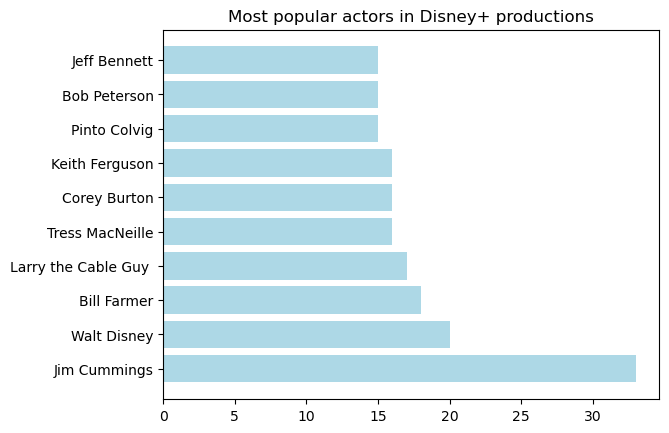

In [14]:
df = df[df['cast'] != 'Missing']
cast = ", ".join(df.iloc[:,3].dropna()).split(", ")
counts,values = pd.Series(cast).value_counts().values, pd.Series(cast).value_counts().index
df_results = pd.DataFrame(list(zip(values,counts)),columns=["value","count"])

most_popular_actors = df_results.head(10)

plt.barh(most_popular_actors['value'], most_popular_actors['count'], color = 'lightblue')
plt.title("Most popular actors in Disney+ productions")
plt.show()

In [15]:
df = df[df['country'] != 'Missing']
df['country'].value_counts().head(10).to_frame()

,count
country,
United States,1005
"United States, Canada",30
United Kingdom,23
"United States, United Kingdom",22
"Canada, United States",17
"United Kingdom, United States",14
"United States, Australia",8
Canada,6
"United States, Japan",4


In [16]:
df = df[df['date_added'] != 'Missing']
df["date_added"] = pd.to_datetime(df['date_added'])
da = df["date_added"].sort_values()
da = da[:-3]
da.value_counts().head(10).to_frame()

,count
date_added,
2019-11-12,722
2021-11-12,28
2020-01-01,28
2020-04-03,26
2020-05-01,19
2021-04-02,16
2020-07-31,15
2020-08-14,13
2020-09-18,12


In [17]:
df['release_year'].value_counts().sort_values(ascending=False).head(10).to_frame()

,count
release_year,
2021,125
2020,114
2019,99
2017,69
2018,65
2016,61
2011,52
2014,50
2015,46


In [18]:
df[df['release_year'] < 1939].sort_values(by=['release_year'], ascending=True)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1220,Movie,Steamboat Willie,"Walt Disney, Ub Iwerks",Walt Disney,United States,2019-11-12,1928,TV-Y7,8 min,"Animation, Family, Kids",Watch Mickey Mouse's classic cartoon debut. Se...
736,Movie,Babes in the Woods,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8 min,"Animation, Family, Fantasy",Two children wander the forest and get lured i...
893,Movie,Flowers and Trees,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8 min,"Animation, Family, Kids","It's spring, and the flowers, mushrooms, and t..."
1178,Movie,Santa's Workshop,Wilfred Jackson,NaN,United States,2019-11-12,1932,TV-G,7 min,"Animation, Family, Fantasy",Santa and his elves make toys to deliver on Ch...
1418,Movie,Ye Olden Days,Bert Gillett,NaN,United States,2019-11-12,1933,TV-Y7,9 min,"Animation, Comedy, Family",Minnie is locked away for not marrying a princ...
1362,Movie,Three Little Pigs,Burt Gillett,"Billy Bletcher, Pinto Colvig, Dorothy Compton,...",United States,2019-11-12,1933,TV-Y7,9 min,"Animation, Family, Kids",A Disney telling of the Three Little Pigs. See...
1317,Movie,The Pied Piper,Wilfred Jackson,NaN,United States,2019-11-12,1933,TV-G,8 min,"Animation, Family, Musical",The Pied Piper lures the children out of town....
1356,Movie,The Wise Little Hen,Wilfred Jackson,"Clarence Nash, Florence Gill",United States,2019-11-12,1934,TV-G,8 min,"Animation, Family, Kids",Donald Duck learns that you must work for a ha...
1254,Movie,The Big Bad Wolf,Burt Gillett,NaN,United States,2019-11-12,1934,TV-Y7,9 min,"Animation, Family, Musical",Red Riding Hood travels to visit her sick gran...
922,Movie,Grasshopper and the Ants,Wilfred Jackson,NaN,United States,2019-11-12,1934,TV-G,8 min,"Animation, Family, Music",A grasshopper learns a lesson about hard work....


In [19]:
df[df['release_year'] >= 1939].sort_values(by=['release_year'], ascending=True)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
741,Movie,Beach Picnic,Clyde Geronimi,NaN,United States,2019-11-12,1939,TV-G,9 min,"Animation, Comedy, Family",Donald Duck and Pluto are at the beach. See de...
1285,Movie,The Hockey Champ,Jack King,NaN,United States,2019-11-12,1939,TV-G,9 min,"Animation, Comedy, Family",Donald and his nephews play Hockey. See detail...
587,Movie,Sea Scouts,Dick Lundy,NaN,United States,2020-04-03,1939,TV-PG,8 min,"Animation, Family",Donald and his nephews encounter a shark. See ...
1203,Movie,Society Dog Show,Bill Roberts,"Pinto Colvig, Walt Disney",United States,2019-11-12,1939,TV-G,9 min,"Animation, Comedy, Family","Pluto is out of place at a dog show, but he pr..."
1352,Movie,The Ugly Duckling,Jack Cutting,NaN,United States,2019-11-12,1939,TV-Y7,9 min,"Animation, Family",A baby duckling is shunned by his family becau...
...,...,...,...,...,...,...,...,...,...,...,...
148,TV Show,Mickey Mouse Funhouse,NaN,"Bret Iwan, Kaitlyn Robrock, Bill Farmer, Tony ...",United States,2021-07-28,2021,TV-Y,1 Season,"Animation, Kids",Mickey Mouse Funhouse is filled with silly adv...
145,TV Show,Chip 'n' Dale: Park Life,NaN,"Matthew Géczy, Kaycie Chase, Bill Farmer, Sylv...",NaN,2021-07-28,2021,TV-Y7,1 Season,"Animation, Buddy, Comedy",Two tiny chipmunks have huge adventures while ...
143,Movie,Built for Mars: The Perseverance Rover,Mark J Davis,Steven French,NaN,2021-07-30,2021,TV-PG,88 min,Documentary,BUILT FOR MARS: THE PERSEVERANCE ROVER follows...
139,Movie,Killer Shark vs Killer Whale,NaN,Edward Marcoux,NaN,2021-08-06,2021,TV-14,44 min,"Animals & Nature, Documentary",Orcas attack white sharks for their livers lea...


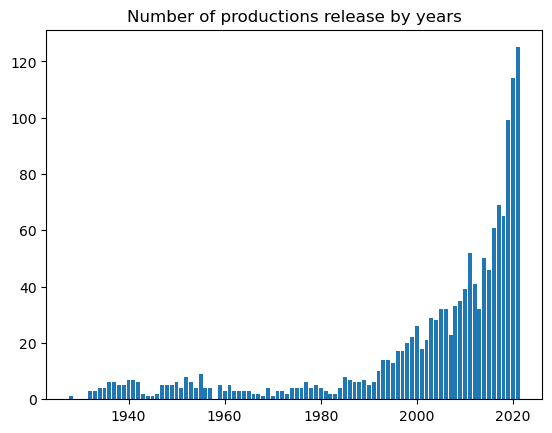

In [20]:
plt.bar(df['release_year'].value_counts().keys(), df['release_year'].value_counts())
plt.title("Number of productions release by years")
plt.show()

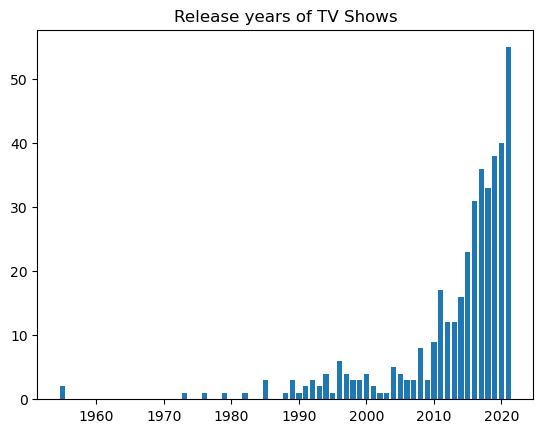

In [21]:
TV_show = df[df['type'] == 'TV Show']
plt.bar(TV_show['release_year'].value_counts().keys(), TV_show['release_year'].value_counts())
plt.title("Release years of TV Shows")
plt.show()

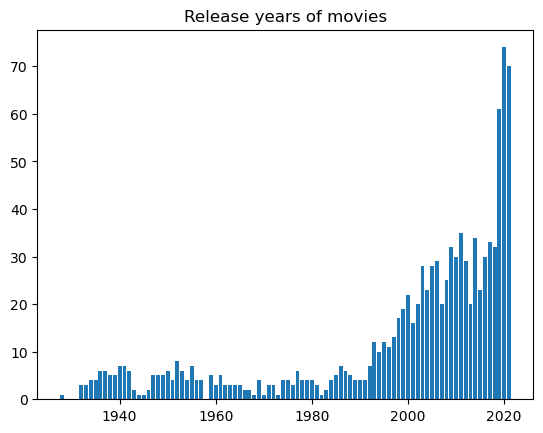

In [22]:
Movie = df[df['type'] == 'Movie']
plt.bar(Movie['release_year'].value_counts().keys(), Movie['release_year'].value_counts())
plt.title("Release years of movies")
plt.show()

In [23]:
# TV shows with the highest number of seasons

TV_show = TV_show.rename(columns={'duration': 'seasons'})
TV_show['seasons'] = TV_show['seasons'].apply(lambda x: x.split(' ')[0])
TV_show.sort_values(by='seasons', ascending=False).head(10)

,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
553,TV Show,America's Funniest Home Videos,NaN,Tom Bergeron,United States,2020-04-24,1989,TV-PG,9,"Comedy, Family, Fantasy",Home videos compete for cash prizes. Program i...
125,TV Show,Dr. K's Exotic Animal ER,NaN,"Dr. Susan Kelleher, Art Edmonds",NaN,2021-08-25,2014,TV-14,9,"Animals & Nature, Docuseries, Family",Dedicated veterinarians treat a colorful array...
557,TV Show,Brain Games,NaN,Neil Harris,United States,2020-04-17,2011,TV-G,8,"Docuseries, Family, Game Show / Competition",Brain Games features games & experiments revea...
285,TV Show,Car SOS,NaN,NaN,United Kingdom,2021-02-26,2012,TV-PG,8,"Buddy, Comedy, Docuseries",Decaying classic cars are revived by two exper...
759,TV Show,Boy Meets World,NaN,"Ben Savage, William Daniels, Betsy Randle, Wil...",United States,2019-11-12,1993,TV-PG,7,"Comedy, Coming of Age, Family","Adolescent Cory Matthews grows up, and faces p..."
618,TV Show,Star Wars: The Clone Wars,NaN,"Tom Kane, Matt Lanter, Ashley Eckstein, James ...",United States,2020-02-21,2008,TV-PG,7,"Action-Adventure, Animation, Science Fiction","The saga continues, set in a faraway galaxy!"
412,TV Show,Once Upon a Time,NaN,"Ginnifer Goodwin, Jennifer Morrison, Robert Ca...",United States,2020-09-18,2011,TV-PG,7,"Action-Adventure, Fantasy, Soap Opera / Melodrama",Fairy tale characters inhabit a land of good a...
307,TV Show,Wicked Tuna: Outer Banks,NaN,Bill Ratner,NaN,2021-02-05,2013,TV-14,7,"Animals & Nature, Docuseries, Family",Fishermen venture to North Carolina’s Outer Ba...
179,TV Show,When Sharks Attack,NaN,Eric Meyers,United States,2021-07-09,2013,TV-14,7,Reality,National Geographic investigates shark attacks.
221,TV Show,Schoolhouse Rock!,NaN,"Bob Dorough, Jack Sheldon, Lynn Ahrens, Grady ...",United States,2021-05-17,1973,TV-G,6,"Animals & Nature, Animation, Kids","Musical shorts teach kids history, grammar, an..."


In [24]:
print("Mean number of seasons: ", TV_show['seasons'].astype(int).mean())

Mean number of seasons:  2.1180904522613067


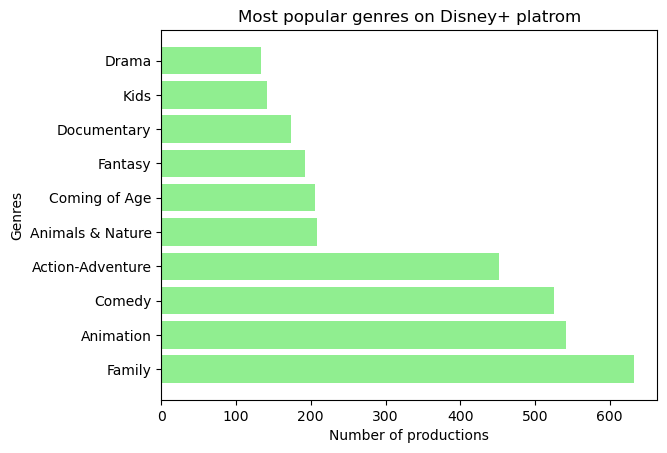

In [25]:
tags = ", ".join(df['listed_in'].dropna()).split(", ")
count,value = pd.Series(tags).value_counts().values[0:10], pd.Series(tags).value_counts().index[0:10]
tags_results = pd.DataFrame(list(zip(value,count)),columns=["value","count"])

plt.barh(value, count, color='lightgreen')
plt.title("Most popular genres on Disney+ platrom")
plt.xlabel("Number of productions")
plt.ylabel("Genres")
plt.show()

In [26]:
# List of genres on Disney+ platrom
value.sort_values()

Index(['Action-Adventure', 'Animals & Nature', 'Animation', 'Comedy',
       'Coming of Age', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Kids'],
      dtype='object')

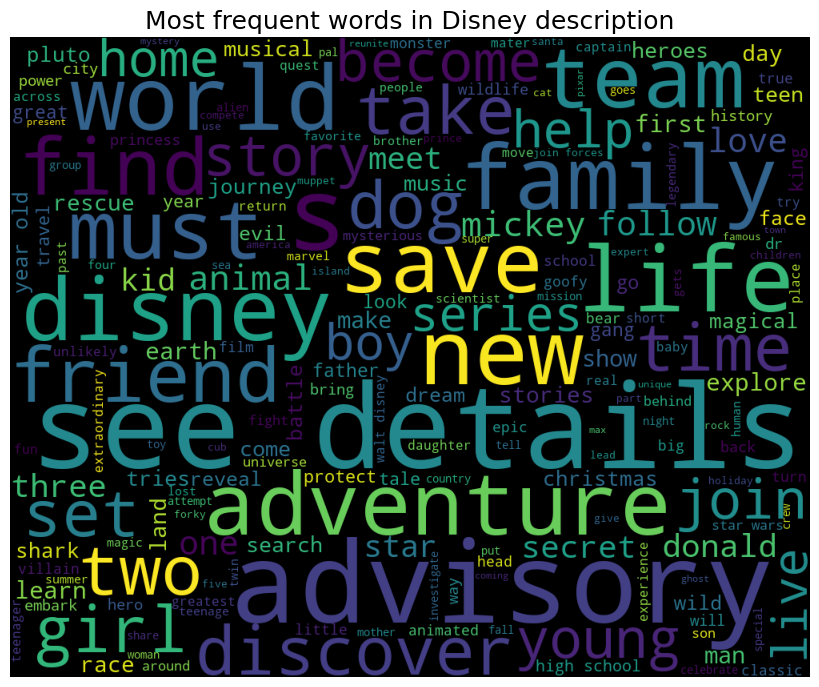

In [27]:
# description - worldclouds

stopwords = set(STOPWORDS)
comment_words = ''
for line in df.description:
    words = line.lower().split()
    comment_words += " ".join(words)+" "

wordcloud = WordCloud(width = 1000, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Most frequent words in Disney description", fontsize=18)
plt.show()

In [28]:
# Impute NaN values in the 'director' column with 'Missing'
df['director'] = df['director'].fillna('Missing')
df['cast'] = df['cast'].fillna('Missing')
df['country'] = df['country'].fillna('Missing')
df['date_added'] = df['date_added'].fillna('Missing')
df['rating'] = df['rating'].fillna('Missing')

Q1. Understanding what content is available in different countries

In [43]:
# Count the number of unique countries in the DataFrame
unique_countries = df['country'].nunique()

print("Number of different countries:", unique_countries)

Number of different countries: 89


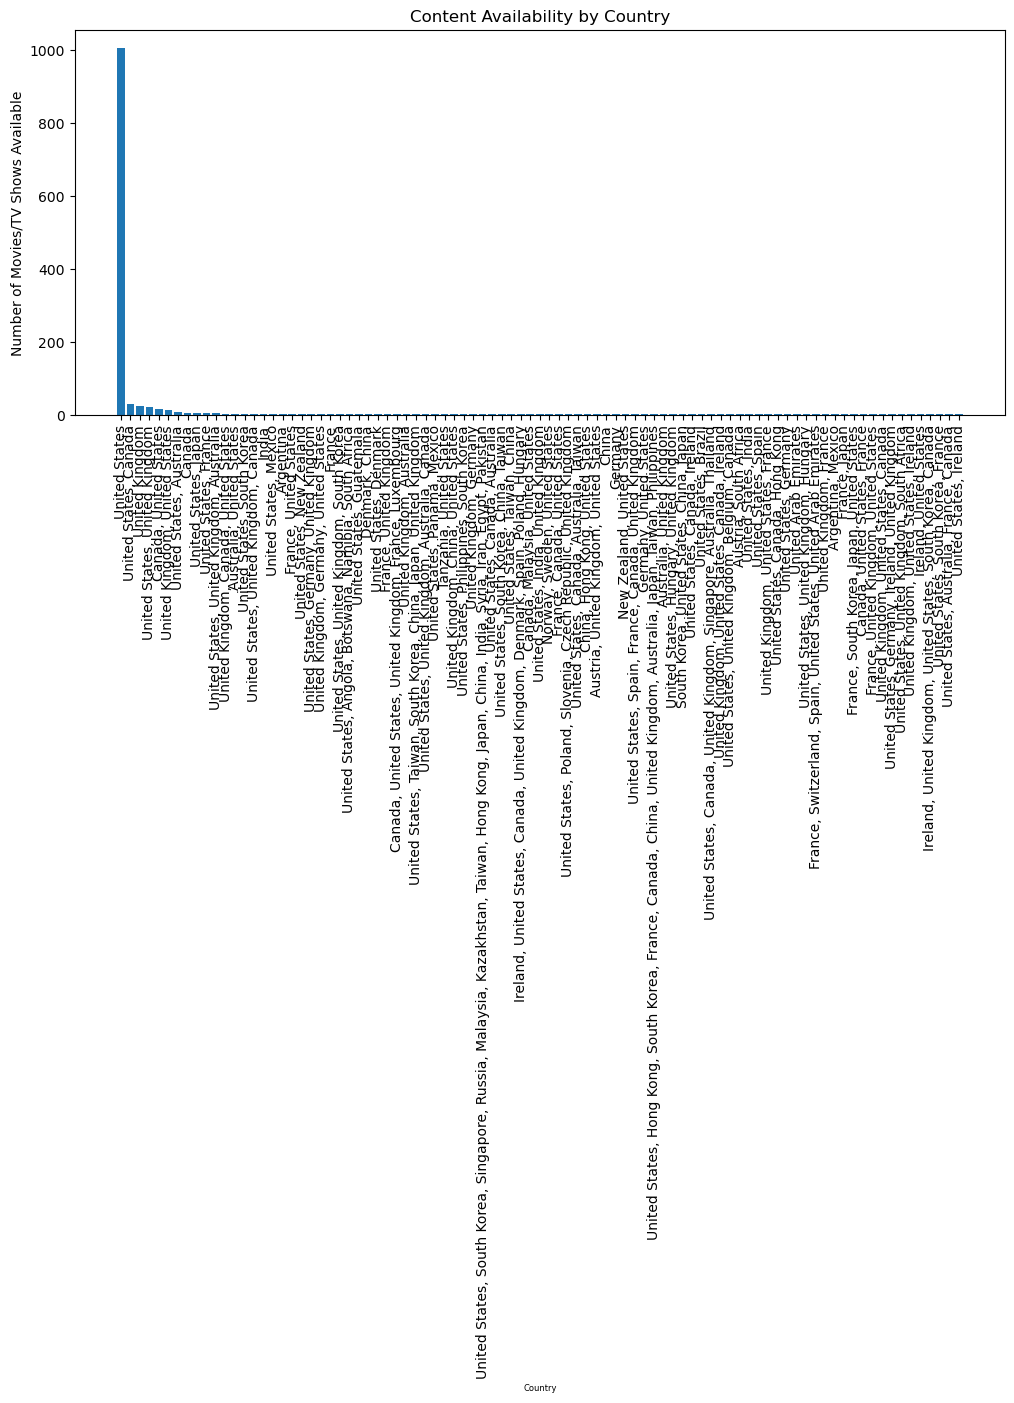

In [55]:
# Count the number of movies/TV shows available in each country
country_counts = df['country'].value_counts()

# Create a bar chart to visualize content availability by country
plt.figure(figsize=(12, 5))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel("Country", fontsize=6)
plt.ylabel("Number of Movies/TV Shows Available", fontsize=10)
plt.title("Content Availability by Country", fontsize=12)
plt.xticks(rotation=90)
plt.show()

Q2. Identifying similar content by matching text-based features

In [57]:
#import pandas as pd
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import cosine_similarity

In [58]:
# Extract features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

# Calculate cosine similarity between content
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a DataFrame to visualize the similarity scores
similarity_df = pd.DataFrame(similarity_matrix, columns=df['title'], index=df['title'])

# Print the similarity matrix
print(similarity_df)

title                                           Ice Age: A Mammoth Christmas  \
title                                                                          
Ice Age: A Mammoth Christmas                                        1.000000   
Becoming Cousteau                                                   0.008520   
Port Protection Alaska                                              0.000000   
Secrets of the Zoo: Tampa                                           0.045551   
A Muppets Christmas: Letters To Santa                               0.009978   
...                                                                      ...   
X-Men Origins: Wolverine                                            0.000000   
Night at the Museum: Battle of the Smithsonian                      0.007424   
Eddie the Eagle                                                     0.006652   
Bend It Like Beckham                                                0.007323   
Captain Sparky vs. The Flying Saucers   

Q3. Network analysis of Actors / Directors and find interesting insights

In [66]:
#import networkx as nx
#import matplotlib.pyplot as plt

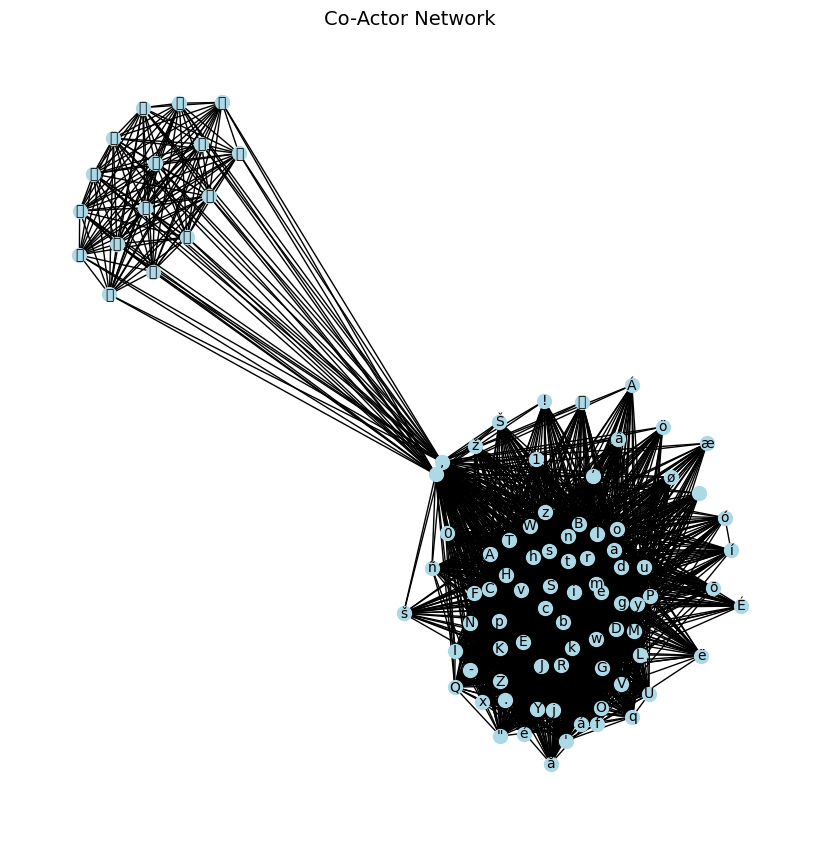

In [67]:
# Create a graph
G = nx.Graph()

# Add nodes (actors)
for row in df['cast']:
    G.add_nodes_from(row)

# Add edges (co-actors)
for row in df['cast']:
    for actor1 in row:
        for actor2 in row:
            if actor1 != actor2:
                G.add_edge(actor1, actor2)
                
# Visualize the co-actor network
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=100, node_color='lightblue', font_size=10, font_color='black')
plt.title("Co-Actor Network", fontsize=14)
plt.show()

Q4. Does Disney+ has more focus on TV Shows than movies in recent years.

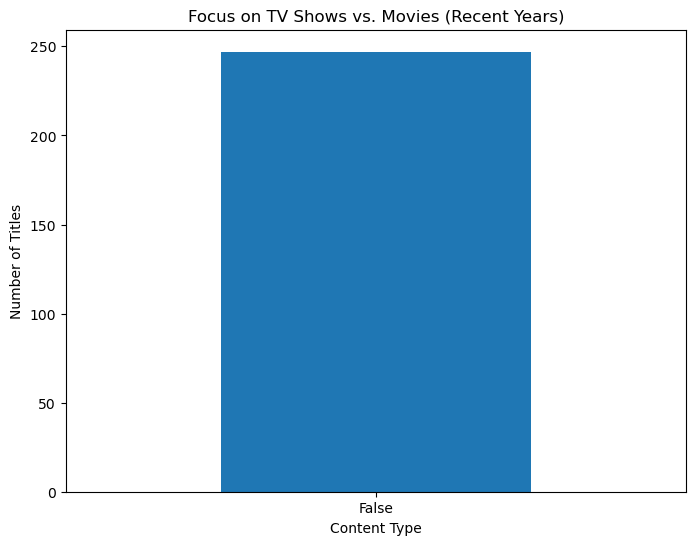

In [75]:
# Filter data for recent years (e.g., last 5 years)
recent_years = df[df['release_year'] >= 2018]

# Count the number of TV shows and movies in recent years
content_counts = recent_years['title'].str.contains('TV Show').value_counts()

# Create a bar chart to visualize the focus on TV shows vs. movies
plt.figure(figsize=(8, 6))
content_counts.plot(kind='bar', rot=0)
plt.xlabel("Content Type", fontsize=10)
plt.ylabel("Number of Titles", fontsize=10)
plt.title("Focus on TV Shows vs. Movies (Recent Years)", fontsize=12)
plt.show()